<a href="https://colab.research.google.com/github/Zerubabel-J/moonlight-energy-solutions-analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/TenX/data/togo-dapaong_qc.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:

print(data.describe())
print(data.isnull().sum())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [7]:
summary_stats = data.describe()
print(summary_stats)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [8]:
from scipy import stats
import numpy as np

data['zscore_GHI'] = np.abs(stats.zscore(data['GHI']))
outliers = data[data['zscore_GHI'] > 3]  # Flagging data points with z-score > 3


**Time Series Analysis:**

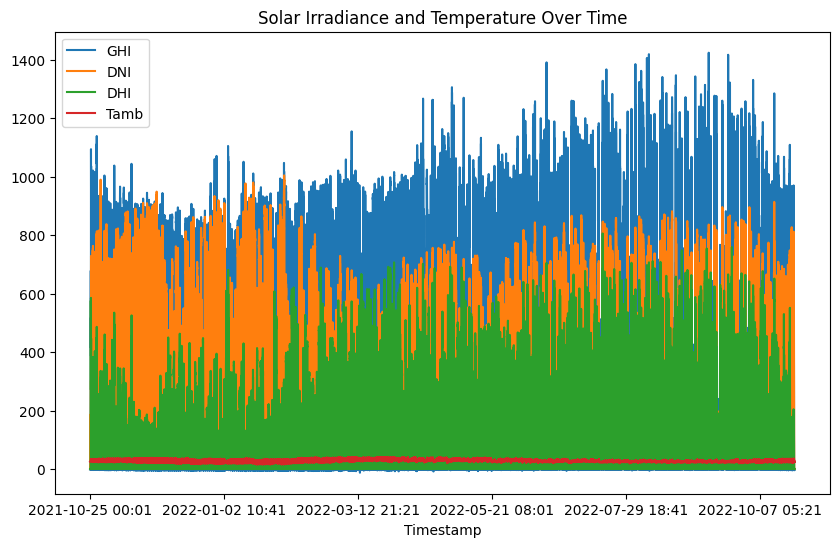

In [10]:
import matplotlib.pyplot as plt

data.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 6))
plt.title('Solar Irradiance and Temperature Over Time')
plt.show()


**Cleaning Impact Analysis:**

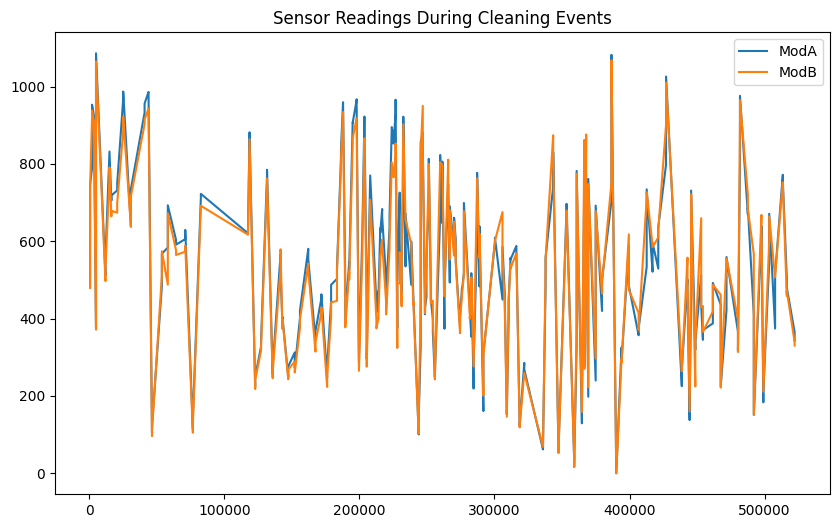

In [11]:
cleaning_data = data[data['Cleaning'] == 1]
cleaning_data[['ModA', 'ModB']].plot(figsize=(10, 6))
plt.title('Sensor Readings During Cleaning Events')
plt.show()


**Correlation Analysis:**

In [16]:
import seaborn as sns
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()


# corr = data.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


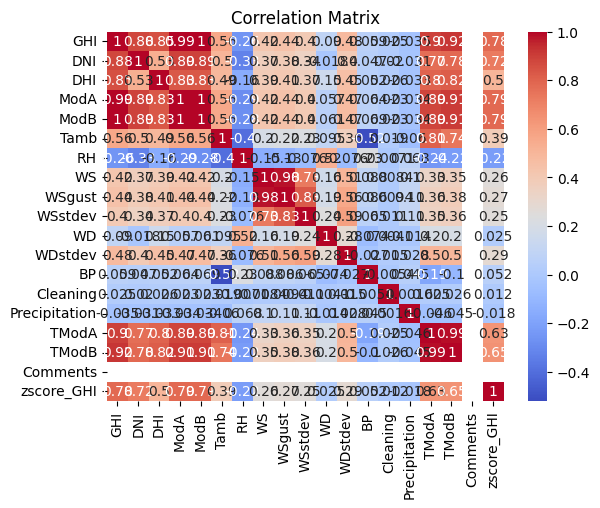

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Wind and Temperature Analysis:**

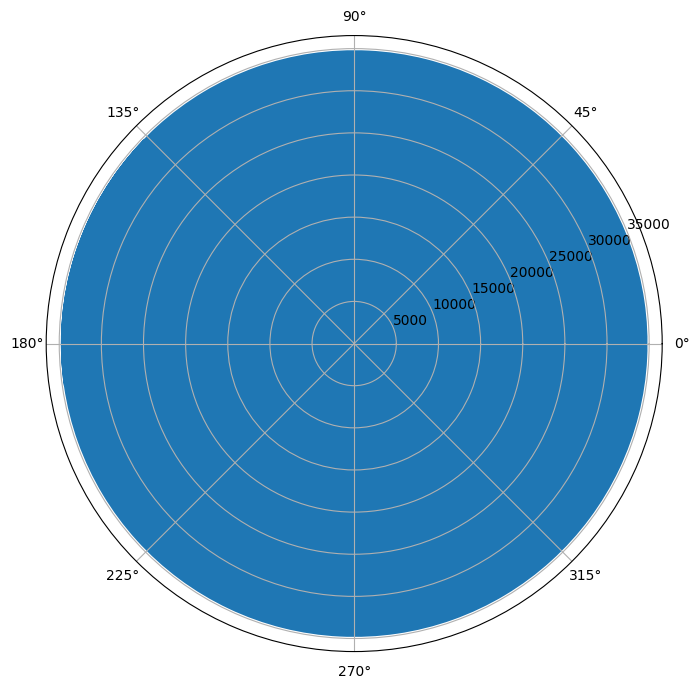

In [13]:
# Polar plot example for wind direction
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.hist(data['WD'], bins=50)
plt.show()


**Histograms:**

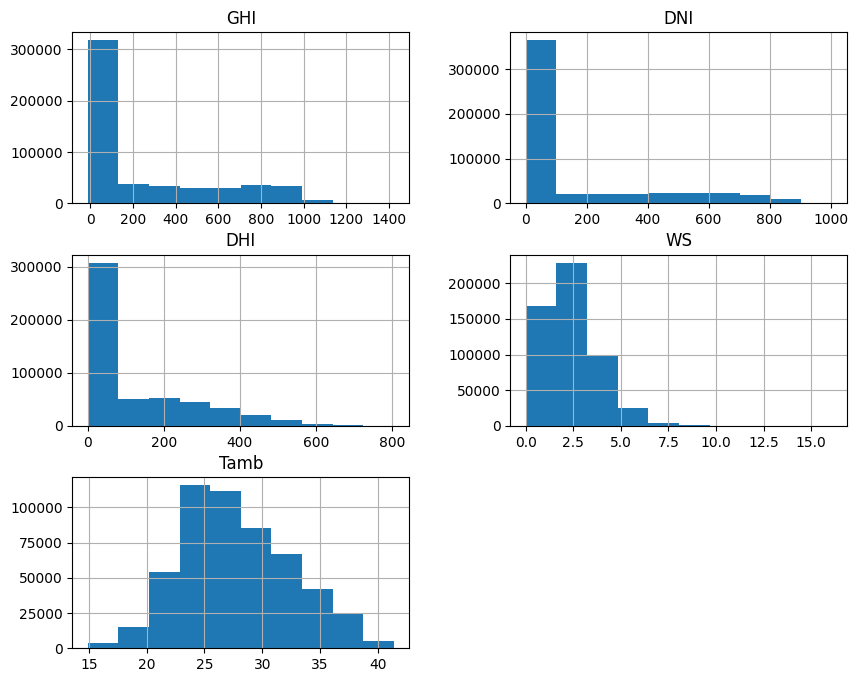

In [14]:
data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(10, 8))
plt.show()


**Bubble Charts:**

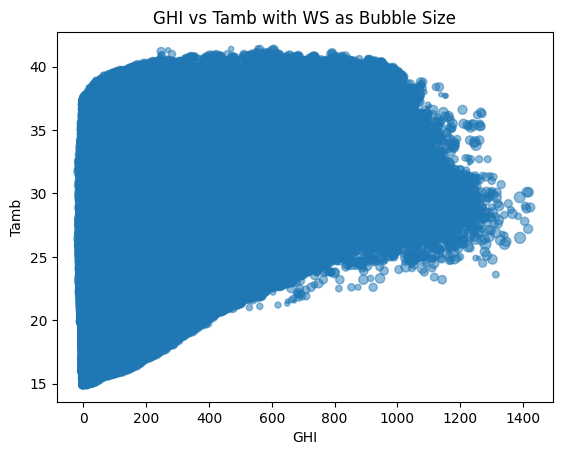

In [15]:
plt.scatter(data['GHI'], data['Tamb'], s=data['WS']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with WS as Bubble Size')
plt.show()
